<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-HW-4/blob/main/ML_Zoomcamp_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning ZoomCamp - Homework 3 
**Author.....: Carlos Manuel de Oliveira Alves**<br>
**Created...: 02/10/2022**

In [75]:
# Import all necessay libraries that we will use in this homework
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold


from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.linear_model import Ridge
from sklearn import metrics

# Import the library warnings to ignore the warnings from the system
import warnings
warnings.filterwarnings("ignore")

In [76]:
# Data Import:

# Locate dataset for the homework
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'

In [77]:
# Download dataset and store it locally with different file name
!wget $data -O data.csv

--2022-10-03 10:56:25--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-03 10:56:25 (7.34 MB/s) - ‘data.csv’ saved [73250/73250]



In [78]:
# Store data using the Pandas library for this homework
data = pd.read_csv('data.csv')

In [79]:
# Check total of rows and columns of the dataset
print(data.shape)

(1319, 12)


In [80]:
# Check the first 5 rows of the dataset
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [81]:
# Create the target variable by mapping yes to 1 and no to 0
data['card']=(data['card']=='yes').astype(int)

In [82]:
# Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. 
# Use train_test_split function for that with random_state=1
data_full_train,data_test=train_test_split(data,test_size=0.2,random_state=1)
data_train,data_val=train_test_split(data_full_train,test_size=0.25,random_state=1)

In [83]:
# Use the function info to get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


In [84]:
# Get the card variables from train, validation and test dataframes
y_train = data_train.card.values
y_val   = data_val.card.values
y_test  = data_test.card.values

In [85]:
# Delete the serie card from the dataframes: train, validation and test
del data_train['card']
del data_val['card']
del data_test['card']

In [86]:
# Create an array with the numerical features
numerical_feature = data_train.select_dtypes(include=np.number).columns.tolist()
numerical_feature

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [87]:
# Create an array with the categorical features
categorical =data.select_dtypes(include=['object']).columns.tolist()
categorical

['owner', 'selfemp']

In [88]:
# Create a list to store the scores of the ROC AUC
roc_auc=[]

# For loop to iterate all the numerical features
for feature in numerical_feature:

    # Create a model logistic regression
    model = LogisticRegression()

    # For training the model we use the fit method
    model.fit(data_train[feature].to_frame(),y_train)

    # Apply our model on Y predition and use the first column
    y_pred = model.predict_proba(data_test[feature].to_frame())[:,1]

    # Create the values FPR, TPR and use function ROC Curve with y_test and y_pred
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Computes the AUC and store result
    score = auc(fpr, tpr)
    
    # Add to an array the result of the AUC function 
    roc_auc.append([round(score,3),feature])

# Store a new array sorted with ROC AUC by the first element in asceding order
result = np.sort(roc_auc, axis = 0)

# Print the ROC AUC Scores by ascending order 
print("ROC AUC Scores:", result )

ROC AUC Scores: [['0.488' 'active']
 ['0.504' 'age']
 ['0.554' 'dependents']
 ['0.559' 'expenditure']
 ['0.583' 'income']
 ['0.605' 'majorcards']
 ['0.724' 'months']
 ['0.992' 'reports']
 ['0.997' 'share']]


In [89]:
# Question 1 : Which numerical variable (among the following 4) has the highest AUC?
#    reports
#    dependents
#    active
#    share
# Answer for Question 1 : share

In [90]:
# Training the model:

# Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

# Create a new instance of the DictVectorizer class without sparse
dv=DictVectorizer(sparse=False)

# Turn the data into a dictionary and we want each row to turn into a dictionary
train_dict = data_train[categorical+numerical_feature].to_dict(orient='records')

# Use the function transform with our DictVectorizer
X_train = dv.fit_transform(train_dict)

# Create a model logistic regression and define the parameter and define the max duration
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# For training the model we use the fit method
model.fit(X_train, y_train)

# Create validation dictionary with categorical and numerical variables
val_dict = data_val[categorical + numerical_feature].to_dict(orient='records')

# Use the function transform with our validation dictionary
X_val = dv.transform(val_dict)

# Apply our model on Y prediction and use the first column
y_pred=model.predict_proba(X_val)[:,1]

# Create the values FPR, TPR and use function ROC Curve with y_val and y_pred
fpr, tpr, thresholds = roc_curve(y_val, y_pred)


auc(fpr, tpr).round(3)

0.995

In [91]:
# Question 2 : What's the AUC of this model on the validation dataset? (round to 3 digits)
#   0.615
#   0.515
#   0.715
#   0.995
# Answer for Question 2 : 0.995

In [92]:
# Now let's compute precision and recall for our model.

# Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.0
# Use the function linspace to generate numbers from 0 to 1 with size of the array 101 elements
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [93]:
# Create a list to store all the accuracies
scores = []

# For eah of the values above we can treat as a threshold
for t in thresholds:

    # Create an array for customers have card and this is for case validations are 1
    actual_positive = (y_val == 1)

    # Create an array for customers don't have card and this is for case validations are 0
    actual_negative = (y_val == 0)
    
    # Store the positive predictions
    predict_positive = (y_pred >= t)

    # Store the negative predictions
    predict_negative = (y_pred < t)

    # Store how many predictions and actual positives are
    tp = (predict_positive & actual_positive).sum()

    # Store the true negatives values in a variable
    tn = (predict_negative & actual_negative).sum()

    # Store the false positive values in a variable
    fp = (predict_positive & actual_negative).sum()

    # Store the false negatives values in a variable
    fn = (predict_negative & actual_positive).sum()
    
    # Append the list scores with the threshold and results of TP, FP, FN and TN
    scores.append((t, tp, fp, fn, tn))

In [94]:
# Specify the columns names of the dataframe scores
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

# Create dataframe scores with the data from scores list and add column names
df_scores = pd.DataFrame(scores, columns=columns)

# Compute the true positive rates of the dataframe scores
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

# Compute the false positive rates of the dataframe scores
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

# Compute the precision rate of the dataframe score
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)

# Compute the recall rate of the dataframe score
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

# Compute the AUC rate of the dataframe score
df_scores['auc'] = auc(df_scores.fpr, df_scores.tpr)

# Check the first 5 rows of the dataframe score
df_scores.head()

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,auc
0,0.00,211,53,0,0,1.0,1.000000,0.799242,1.0,0.994992
1,0.01,211,34,0,19,1.0,0.641509,0.861224,1.0,0.994992
2,0.02,211,31,0,22,1.0,0.584906,0.871901,1.0,0.994992
3,0.03,211,24,0,29,1.0,0.452830,0.897872,1.0,0.994992
4,0.04,211,22,0,31,1.0,0.415094,0.905579,1.0,0.994992


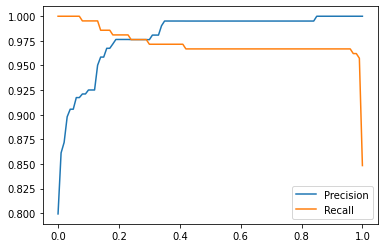

In [95]:
# Plot the scores of Precision of the dataframe scores
plt.plot(df_scores.threshold, df_scores.precision, label='Precision')

# Plot the scores of Recall of the dataframe scores
plt.plot(df_scores.threshold, df_scores.recall, label='Recall')

# Plot the scores of Precison and Re call with legends
plt.legend()

# Plot the scores of Precison and Recall
plt.show()

In [96]:
# Question 3 : At which threshold precision and recall curves intersect?
#   0.1
#   0.3
#   0.6
#   0.8
# Answer for Question 3 : 0.3

In [97]:
# Precision and recall are conflicting - when one grows, the other goes down. 
# That's why they are often combined into the F1 score - a metrics that takes into account both

# This is the formula for computing F1:
# F1 = 2 P R / (P + R)
# Where P is precision and R is recall.

# Compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01
df_scores['F1'] = ( 2 * df_scores.recall * df_scores.precision) / (df_scores.precision + df_scores.recall)

# Check the first 5 rows of the dataframe score
df_scores.head()


,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,auc,F1
0,0.00,211,53,0,0,1.0,1.000000,0.799242,1.0,0.994992,0.888421
1,0.01,211,34,0,19,1.0,0.641509,0.861224,1.0,0.994992,0.925439
2,0.02,211,31,0,22,1.0,0.584906,0.871901,1.0,0.994992,0.931567
3,0.03,211,24,0,29,1.0,0.452830,0.897872,1.0,0.994992,0.946188
4,0.04,211,22,0,31,1.0,0.415094,0.905579,1.0,0.994992,0.950450


In [98]:
# Question 4 : At which threshold F1 is maximal?
#   0.1
#   0.4
#   0.6
#   0.7
# Answer for Question 4 : 0.4

In [99]:
# Create a function for training
def train(data_train, y_train, C=1.0):
    
    # Create dictionaries that extract from our dataframe categoricl and numerical variables
    dicts = data_train[categorical+numerical_feature].to_dict(orient='records')

    # Create a new instance of the DictVectorizer class without sparse
    dv = DictVectorizer(sparse=False)
    
    # Use the function transform with our DictVectorizer
    X_train = dv.fit_transform(dicts)

    # Create a model logistic regression and define the parameter and duration
    model = LogisticRegression(C=C, max_iter=1000)
    
    # For training the model we use the fit method
    model.fit(X_train, y_train)
    
    # Return the DictVectorizer and model
    return dv, model

In [100]:
# Call function train and store results of dv and model
dv, model = train(data_train, y_train, C=1)

In [101]:
# Create a function for predict
def predict(data, dv, model):

    # Convert the dataframe into a list of dictionaries
    dicts = data[categorical+numerical_feature].to_dict(orient='records')

    # Creates the feature matrix using the vectorizer
    X = dv.transform(dicts)

    # Use the model predict proba and take the second column
    y_pred = model.predict_proba(X)[:, 1]

    # Return our prediction
    return y_pred

In [102]:
# Use the function KFold to split the data in 5 parts and seed 2
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

# Create a list with scores
scores = []

# Iterate over the full train dataframe using the function split together with train and val indexes
for train_idx, val_idx in kfold.split(data_full_train):

    # Use iloc to select a part of the full train dataframe for train
    data_train = data_full_train.iloc[train_idx]

    # Use iloc to select a part of the full train dataframe for validation
    data_val = data_full_train.iloc[val_idx]

    # Use iloc to select a part of the full train dataframe for train and validation
    y_train = data_train.card.values
    y_val = data_val.card.values

    # Call function train and store results of dv and model
    dv, model = train(data_train, y_train,C=1)

    # Call the function predict and use with our validation datset
    y_pred = predict(data_val, dv, model)
    
    # Compute and store the ROC AUC score
    auc = roc_auc_score(y_val, y_pred)
    
    # After evaluate the model we store the results
    scores.append(auc)

# Print the mean score and standard deviation
print(f'{np.mean(scores):.3f} +- {np.std(scores):.3f}')

0.995 +- 0.003


In [ ]:
# Question 5 : How large is standard devidation of the AUC scores across different folds?
#   0.003
#   0.014
#   0.09
#   0.24
# Answer for Question 5 : 0.003

In [103]:
# Install TQDM to see progress of each iterations of a loop
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
# Import the library of TQDM
from tqdm.auto import tqdm

In [106]:
# Declare how many splits we will do with dataframe
n_splits = 5

# Create for loop that save the results after each iteraction we evaluate the model
for C in tqdm([0.01, 0.1, 1, 10]):

    # Use the function KFold to split the data in 5 parts
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    # Create a list with scores
    scores = []

    # Iterate over the full train dataframe using the function split together with train and val indexes
    for train_idx, val_idx in kfold.split(data_full_train):

        # Use iloc to select a part of the full train dataframe for train
        data_train = data_full_train.iloc[train_idx]

        # Use iloc to select a part of the full train dataframe for validation
        data_val = data_full_train.iloc[val_idx]

        # Store the card values with y train and validation
        y_train = data_train.card.values
        y_val = data_val.card.values


        dv, model = train(data_train, y_train,C=C)


        y_pred = predict(data_val, dv, model)
    

        auc = roc_auc_score(y_val, y_pred)


        scores.append(auc)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.995 +- 0.004
C=0.1 0.997 +- 0.003
C=1 0.996 +- 0.003
C=10 0.997 +- 0.003
